In [14]:
from __future__ import division
import itertools
from random import randint, seed
#from sage.all import gcd, inverse_mod

In [15]:
# https://en.wikibooks.org/wiki/Algorithm_Implementation/Mathematics/Extended_Euclidean_algorithm
def xgcd(b, n):
    x0, x1, y0, y1 = 1, 0, 0, 1
    while n != 0:
        q, b, n = b // n, n, b % n
        x0, x1 = x1, x0 - q * x1
        y0, y1 = y1, y0 - q * y1
    return  b, x0, y0

def gcd(a, b):
    return xgcd(a, b)[0]

def inverse_mod(r, q):
    assert gcd(r, q) == 1
    res = xgcd(r, q)[1]
    if res < 0:
        res += q
    assert res > 0 and res < q
    return res

In [29]:
def knapsack_brute_force(knapsack, x, solution):
    
    if x == 0:
        return [True, solution]
    
    if len(knapsack) == 0:
        if x == 0:
            return [True, solution]
        else:
            print 'c'
            return [False, []]
    
    if len(knapsack) == 1:
        if knapsack[0] == x:
            solution.append(x)
            return [True, solution]
        else:
            return [False, []]
    
    
    curr_elem = knapsack[0]
    
    if curr_elem > x:
        return knapsack_brute_force(knapsack[1:], x, solution)
    
    else:
        # try with taking the first element
        result = knapsack_brute_force(knapsack[1:], x - curr_elem, solution)
        if result[0]:
            solution.append(curr_elem)
            return [True, solution]
        else:
            # try with not taking the first element
            return knapsack_brute_force(knapsack[1:], x, solution)
        
def knapsack_brute_force_bits(knapsack, x):
    sol = knapsack_brute_force(knapsack, x, [])[1]
    res = []
    # dont ask my why in reversed order :D
    for elem in reversed(knapsack):
        if elem in sol:
            res.append(1)
        else:
            res.append(0)
    return res

In [30]:
def new_mochila(N=10, jump=10, sd=0):
    seed(sd)
    diff = [randint(1,jump) for k in range(N)]
    mochila = [diff[0]]
    for i in range(1,len(diff)):
        new_val = sum(mochila) + diff[i]
        mochila.append(new_val)
    return mochila

def split2len(s, n=16):
    def _f(s, n):
        while s:
            yield s[:n]
            s = s[n:]
    return list(_f(s, n))

def text_to_bytes(text, n=0):
    largo = len(text)
    if n > 0:
        text = text + ' '*(n - (largo % n))
    text = text.decode('utf8')
    text_e = ''.join(['{0:016b}'.format(ord(c)) for c in text])
    return text_e

def bytes_to_text(binary):
    return ''.join([unichr(int(ch,2)) for ch in split2len(binary)])

def select_q(mochila):
    suma = sum(mochila)
    return randint(suma+1,suma*10)

def select_r(q):
    try_r = randint(2,q-1)
    while gcd(try_r,q) != 1:
        try_r = randint(2,q)
    return try_r, inverse_mod(try_r,q)

def mochila_camuflada(mochila, q, r):
    return [(r*x)% q for x in mochila]

def codificar(mochila_camuflada, text):
    largo_mochila = len(mochila_camuflada)
    #assert largo_mochila % 16 == 0
    
    texto_codificado = text_to_bytes(text,largo_mochila)
    a_codifcar = split2len(texto_codificado, largo_mochila)
    return [sum([b for (a,b) in zip(k,mochila_camuflada) if a=='1']) for k in a_codifcar], texto_codificado


def unpack(n,l):
    i = len(l) -1
    for i in range(len(l)-1,-1,-1):
        if n>0:
            if l[i] <= n:
                n -= l[i]
                res = 1
            else:
                res = 0
            i-=1
        else:
            res = 0
        yield res

def decodificar(chunk, mochila_o, q, i_r):
    message = (chunk * i_r) % q
    int_message = list(unpack(message,mochila_o))[::-1]
    #print int_message
    #print ''.join(map(str,int_message))
    return bytes_to_text(''.join(map(str,int_message)))

def decodificar2(chunks, mochila_o, q, i_r):
    bits = []
    for chunk in chunks:
        message = (chunk * i_r) % q
        bits += list(unpack(message, mochila_o))[::-1]
        #print bits
    #print ''.join(map(str,bits))
    return bytes_to_text(''.join(map(str, bits)))

def decodificar_brute_force(chunk, mochi_c):
    int_message = list(knapsack_brute_force_bits(mochi_c, chunk))[::-1]
    return bytes_to_text(''.join(map(str,int_message)))

def decodificar_brute_force2(chunks, mochi_c):
    bits = []
    for chunk in chunks:
        bits += list(knapsack_brute_force_bits(mochi_c, chunk))[::-1]
    return bytes_to_text(''.join(map(str, bits)))

In [41]:
mochi = new_mochila(N = 15, jump = 100)
#print mochi
q = select_q(mochi)
r, i_r = select_r(q)
mochi_c = mochila_camuflada(mochi, q, r)
print mochi_c

#texto = 'Nó mé gústÁn lás tÍldÉs'
codifcado, x= codificar(mochi_c, wikipedia)
#print codifcado, x

[39530014L, 34619690L, 191429691L, 203870449L, 60893735L, 257563646L, 227533913L, 218052690L, 44817879L, 238997799L, 160775327L, 219084113L, 139444144L, 35735247L, 192433224L, 207105096L, 259937827L, 84147815L, 274444914L, 23053732L]


In [42]:
decodificar2(codifcado, mochi, q, i_r)

u'Hands Across Hawthorne was a rally held at the Hawthorne Bridge in Portland, Oregon, on May 29, 2011, in response to an attack on a gay male couple one week earlier for holding hands while walking across the bridge. News of the attack spread throughout the Pacific Northwest and the United States. According to the couple and the Portland Police Bureau, a group of five men followed Brad Forkner and Christopher Rosevear along the bridge before they were physically assaulted. The assault was condemned by Portland s gay mayor, Sam Adams, and its police chief, Mike Reese. The attack prompted volunteers from the Q Center, an LGBT community center and non-profit organization, to form street patrols to monitor Portland s downtown area. Several LGBT and human rights organizations sponsored Hands Across Hawthorne in response to the attack, linking hands across the entire span of the Hawthorne Bridge to show solidarity. More than 4,000 people attended the rally.                '

In [44]:
decodificar_brute_force2(codifcado, mochi_c)

u'Hands Across Hawthorne was a rally held at the Hawthorne Bridge in Portland, Oregon, on May 29, 2011, in response to an attack on a gay male couple one week earlier for holding hands while walking across the bridge. News of the attack spread throughout the Pacific Northwest and the United States. According to the couple and the Portland Police Bureau, a group of five men followed Brad Forkner and Christopher Rosevear along the bridge before they were physically assaulted. The assault was condemned by Portland s gay mayor, Sam Adams, and its police chief, Mike Reese. The attack prompted volunteers from the Q Center, an LGBT community center and non-profit organization, to form street patrols to monitor Portland s downtown area. Several LGBT and human rights organizations sponsored Hands Across Hawthorne in response to the attack, linking hands across the entire span of the Hawthorne Bridge to show solidarity. More than 4,000 people attended the rally.                '

In [85]:
import time
import math

times = []
for n in range(2, 20):
    mochi = new_mochila(N = n, jump = 2**n)
    #print math.log(mochi[-1], 2)
    q = select_q(mochi)
    r, i_r = select_r(q)
    mochi_c = mochila_camuflada(mochi, q, r)
    codifcado, x = codificar(mochi_c, wikipedia * 10)
    
    start = time.time()
    decodificar_brute_force2(codifcado, mochi_c)
    end = time.time()
    times.append(end-start)
    print n, end - start

2 0.27799987793
3 0.290999889374
4 0.269000053406
5 0.250999927521
6 0.34099984169
7 0.328999996185
8 0.799000024796
9 1.28199982643
10 1.42499995232
11 3.98300004005
12 6.31900000572
13 5.45700001717


KeyboardInterrupt: 

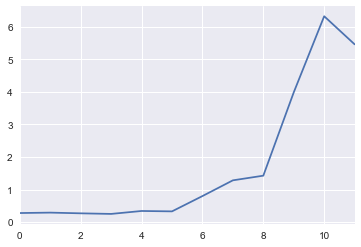

In [86]:
import seaborn as sns
%matplotlib inline

sns.tsplot(times)

In [8]:
(1989946847504225255328163405348356)/ 4258020590543767585443239388571

467L

2^n = E(jump) * 2^n

In [13]:
wikipedia = 'Hands Across Hawthorne was a rally held at the Hawthorne Bridge in Portland, Oregon, on May 29, 2011, in response to an attack on a gay male couple one week earlier for holding hands while walking across the bridge. News of the attack spread throughout the Pacific Northwest and the United States. According to the couple and the Portland Police Bureau, a group of five men followed Brad Forkner and Christopher Rosevear along the bridge before they were physically assaulted. The assault was condemned by Portland s gay mayor, Sam Adams, and its police chief, Mike Reese. The attack prompted volunteers from the Q Center, an LGBT community center and non-profit organization, to form street patrols to monitor Portland s downtown area. Several LGBT and human rights organizations sponsored Hands Across Hawthorne in response to the attack, linking hands across the entire span of the Hawthorne Bridge to show solidarity. More than 4,000 people attended the rally.'
split2len(text_to_bytes(wikipedia, 100), 100)

NameError: name 'split2len' is not defined